### GI data

In [32]:
import os # this allows simple navigation of folders in the notebook
import pandas as pd # this loads Pandas
import numpy as np # This loads NumPy, used to do maths in the notebook
from ebmdatalab import bq # this loads the bennett institute bigquery function
import glob
import matplotlib.pyplot as plt

#### Load datasets

- gi_df: prescribing data, for 0101 and 0103 of the BNF, from 2019-01 to 2024-05
- bnf_df: hierarchical data for legacy bnf codes and names
- practice_df: practice info, including setting code (4=GP practice)
- statistics_df: practice list sizes per month
- ccg_df: CCG/SICBL information

In [33]:
# Load prescribing data from compressed csv chunks
file_pattern = os.path.join("..","data","omep_df_chunk_*.csv.gz")
file_names = glob.glob(file_pattern) # List all files matching the pattern
gi_df = pd.concat([pd.read_csv(file, compression='gzip') for file in file_names], ignore_index=True) # Load each compressed CSV file into a DataFrame and concatenate them
bnf_df = pd.read_csv(os.path.join("..","data","bnf_df.csv"))
practices_df = pd.read_csv(os.path.join("..","data","practices_df.csv"))
statistics_df = pd.read_csv(os.path.join("..","data","statistics_df.csv"))
ccg_df = pd.read_csv(os.path.join("..","data","ccg_df.csv"))

In [34]:
gi_df.head()

,month,pct,practice,bnf_name,bnf_code,items,quantity,net_cost,actual_cost
0,2022-02-01,70F,H82034,Urea [13-C] 50mg tablets breath test kit,010300000AAADAD,6,6.0,127.50,119.43981
1,2022-02-01,92A,H81128,Losec MUPS 10mg gastro-resistant tablets,0103050P0BBADAM,6,196.0,65.10,61.02098
2,2022-02-01,D9Y0V,J82074,Magnesium hydroxide 7.45-8.35% oral suspension BP,0101010Q0AAAGAG,6,4000.0,64.40,60.36564
3,2022-02-01,27D,N81067,Emozul 20mg gastro-resistant capsules,0103050E0BCAAAF,7,168.0,31.82,30.27666
4,2022-02-01,14L,P84074,Maalox Plus oral suspension,0101010L0BEAAAI,8,4000.0,46.56,43.68864


In [35]:
bnf_df.head()

,chapter,chapter_code,section,section_code,para,para_code,subpara,subpara_code,chemical,chemical_code,product,product_code,presentation,presentation_code
0,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Other antacid and simeticone preparations,010101000,Proprietary compound preparation BNF 0101010,010101000BB,Indigestion mixture,010101000BBAJA0
1,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Alexitol sodium,0101010A0AA,Alexitol sodium 360mg tablets,0101010A0AAAAAA
2,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Alexitol sodium,0101010A0,Actal,0101010A0BB,Actal 360mg tablets,0101010A0BBAAAA
3,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide 475mg capsules,0101010C0AAAAAA
4,Gastro-Intestinal System,1,Dyspepsia and gastro-oesophageal reflux disease,101,Antacids and simeticone,10101,Antacids and simeticone,101010,Aluminium hydroxide,0101010C0,Aluminium hydroxide,0101010C0AA,Aluminium hydroxide oral suspension sugar free,0101010C0AAACAC


In [36]:
ranitidine_code = '0103010T0'
ranitidine_exclude_codes = ['0103010T0AAADAD', '0103010T0BBADAD']

In [54]:
data_filtered_ranitidine = gi_df[gi_df['bnf_code'].str.startswith(ranitidine_code, na=False) & 
            ~gi_df['bnf_code'].str.contains('|'.join(ranitidine_exclude_codes), na=False)]

print(data_filtered_ranitidine)

               month    pct practice  \
36        2019-02-01    26A   D82029   
37        2019-02-01    36J   B83628   
39        2019-02-01    72Q   G83018   
40        2019-02-01    71E   C83002   
42        2019-02-01    42D   B82036   
...              ...    ...      ...   
12253456  2019-03-01  A3A8R   Y02824   
12253457  2019-03-01    14L   Y04605   
12253458  2019-03-01    99E   F81006   
12253459  2019-03-01    36L   H85063   
12253460  2019-03-01  M1J4Y   K82064   

                                              bnf_name         bnf_code  \
36        Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
37        Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
39        Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
40        Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
42        Ranitidine 75mg/5ml oral solution sugar free  0103010T0AAAEAE   
...                                                ...              .

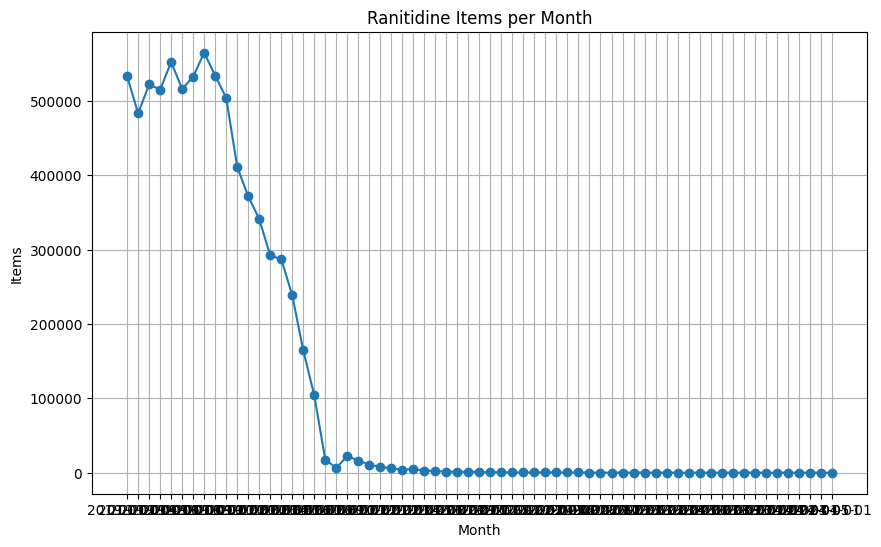

In [56]:
ranitidine_monthly_totals = data_filtered_ranitidine.groupby('month')['items'].sum().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(ranitidine_monthly_totals['month'], ranitidine_monthly_totals['items'], marker='o')

# Add titles and labels
plt.title('Ranitidine Items per Month')
plt.xlabel('Month')
plt.ylabel('Items')

# Show the plot
plt.grid(True)
plt.show()

In [58]:
alternative_H2RA = ['0103010H0', '0103010N0', '0103010D0']

In [59]:
regex_pattern = '^' + '|'.join([prefix for prefix in alternative_H2RA])

data_filtered_alternative_H2RA = gi_df[gi_df['bnf_code'].str.contains(regex_pattern, na=False)]

print(data_filtered_alternative_H2RA)

               month    pct practice  \
12        2021-12-01    36J   B83033   
152       2019-06-01    15F   B86048   
171       2022-11-01    93C   F85688   
190       2020-04-01    11N   L82052   
191       2020-04-01    42D   B82060   
...              ...    ...      ...   
12264802  2019-03-01    00R   P81172   
12264803  2019-03-01  D4U1Y   H81040   
12264804  2019-03-01    11J   J81064   
12264805  2019-03-01    11N   L82044   
12264806  2019-03-01    15N   L83095   

                                               bnf_name         bnf_code  \
12        Cimetidine 200mg/5ml oral solution sugar free  0103010D0AAALAL   
152                            Cimetidine 200mg tablets  0103010D0AAAAAA   
171                            Cimetidine 200mg tablets  0103010D0AAAAAA   
190                            Cimetidine 200mg tablets  0103010D0AAAAAA   
191       Cimetidine 200mg/5ml oral solution sugar free  0103010D0AAALAL   
...                                                 ...        

In [63]:
H2RA_monthly_totals = data_filtered_alternative_H2RA.groupby('month')['items'].sum().reset_index()

print(H2RA_monthly_totals)

         month   items
0   2019-01-01    4640
1   2019-02-01    4171
2   2019-03-01    4475
3   2019-04-01    4382
4   2019-05-01    4646
..         ...     ...
60  2024-01-01  257052
61  2024-02-01  247258
62  2024-03-01  255719
63  2024-04-01  269714
64  2024-05-01  282042

[65 rows x 2 columns]


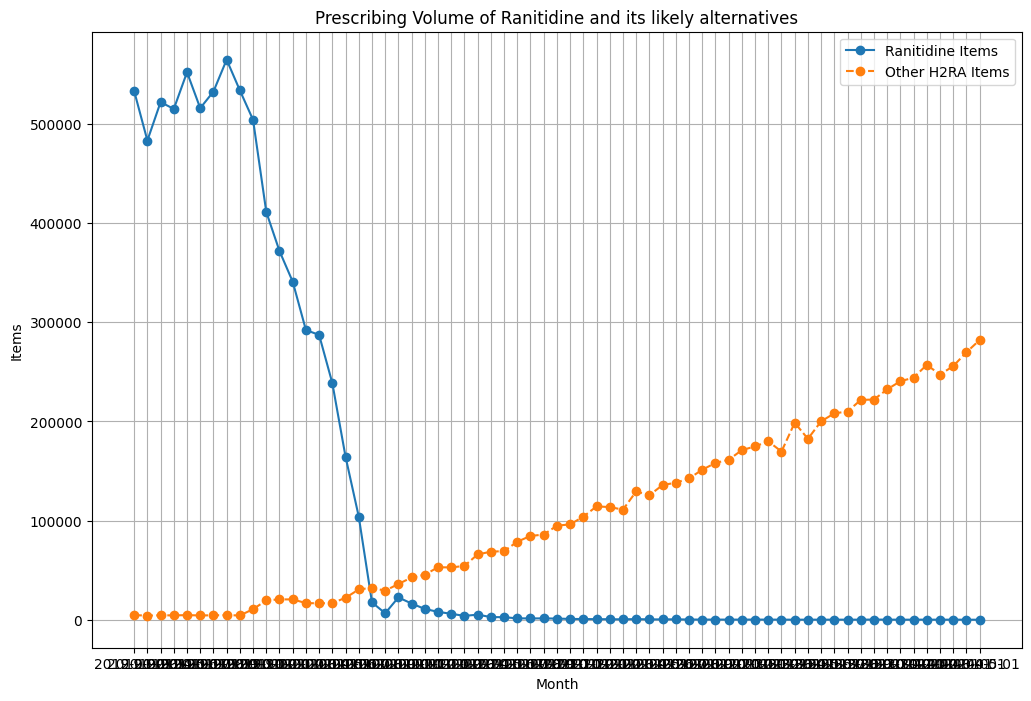

In [64]:
# Plot the original monthly totals for Ranitidine
plt.figure(figsize=(12, 8))
plt.plot(ranitidine_monthly_totals['month'], ranitidine_monthly_totals['items'], marker='o', label='Ranitidine Items')

# Plot the aggregated totals for the Alternative H2RA chemicals
plt.plot(H2RA_monthly_totals['month'], H2RA_monthly_totals['items'], marker='o', linestyle='--', label='Other H2RA Items')

# Add titles and labels
plt.title('Prescribing Volume of Ranitidine and its likely alternatives')
plt.xlabel('Month')
plt.ylabel('Items')

# Adding a legend to differentiate the lines
plt.legend()

# Adding grid for better readability
plt.grid(True)

# Display the plot
plt.show()